## Parameter Correlations

This notebook explores the correlations between different S parameters for 2000 simulated surfaces.

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

The data here consists of parameters extracted from multiple datasets:

1. 2000 256x256 surfaces generated by surface_simulation_generation.ipynb. These surfaces are meant to simulate that of cells/clusters, but they do not have any labels associated with them (so they cannot be used for training). 

2. 100 256x256 surfaces generated using Gaussian noise. These surfaces were first intended for checking area independence, but for robustness we analyze parameter correlations on them as well. Because the values extracted on all these surfaces are relatively similar, we can obtain more robust correlations with fewer datapoints. 

3. 50 256x256 real cell surfaces.

The motivation for using the simulated surfaces is because the lack of as much real data. With 2000 surfaces, even if they are simulated, we can be much more confident about the correlations we see. Moreover, the point of the analysis is primarily to identify highly correlated parameters to exclude later whilst training classifiers. We cannot use the training data itself to perform the analysis without biasing the models.

Regardless, we also analyze the correlations on parameters extracted from the Gaussian surfaces and the real cell surfaces to prove robustness; if the correlations are consistent across datasets, we demonstrate that we can use simulated surfaces to find highly correlated parameters as a feature selection without biasing the classifiers trained on actual cell surfaces.



In [195]:
# Load data
# Simulated data
SIMULATED_PATH = '../data/results/simulated_results_08_02_20.csv'
# Gaussian surfaces
RANDOM_PATH = '../data/results/random_results_08_24_20.csv'
# Real cell surfaces
REAL_PATH = '../data/results/zoomed_results_08_24_20.xlsx'

df = pd.read_csv(SIMULATED_PATH)
# We drop S_2a, as it has zero variance
df = df.drop('S_2a', axis=1)

df_random = pd.read_csv(RANDOM_PATH)
df_random = df_random.drop('S_2a', axis=1)


df_real = pd.read_excel(REAL_PATH)

# We use the only Adhesion channel here; otherwise, we consider 100+ parameters
# The correlation matrices look similar across channels
columns = [col for col in df_real.columns if col.startswith('h_')]
df_real = df_real[columns].drop(columns='h_S_2a')
df_real.columns = df.columns


In [196]:
# Construct the correlation matrices and the most correlated parameters 
C = df.corr()
C_random = df_random.corr()
C_real = df_real.corr()

# Order the pairs by their correlations, removing duplicates and diagonals
C_ordered = (C.where(np.triu(np.ones(C.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))
C_ordered_random = (C_random.where(np.triu(np.ones(C_random.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))
C_ordered_real = (C_real.where(np.triu(np.ones(C_real.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))

# Export correlation matrices
C.to_csv('correlation_matrix_simulated.csv')
C_random.to_csv('correlation_matrix_random.csv')
C_real.to_csv('correlation_matrix_real.csv')

                       

In [197]:
# Show correlation matrix
C

,S_a,S_q,S_sk,S_ku,S_z,S_10z,S_v,S_p,S_mean,S_sc,...,S_td,S_tdi,S_rw,S_rwi,S_hw,S_fd,S_cl20,S_cl37,S_tr20,S_tr37
S_a,1.000000e+00,9.985815e-01,-1.526280e-01,-2.085102e-01,9.341869e-01,9.179290e-01,-9.266723e-01,9.075686e-01,8.567331e-01,5.184964e-01,...,0.125434,-3.339825e-03,2.562052e-02,-1.222901e-01,1.491195e-01,-2.338360e-01,8.275498e-16,8.275498e-16,-3.450724e-02,-5.952961e-02
S_q,9.985815e-01,1.000000e+00,-1.369917e-01,-1.887253e-01,9.430490e-01,9.280800e-01,-9.330451e-01,9.176613e-01,8.585639e-01,5.265658e-01,...,0.125925,-1.213975e-03,2.701815e-02,-1.195408e-01,1.464704e-01,-2.314243e-01,-1.885259e-15,-1.885259e-15,-3.236416e-02,-5.654290e-02
S_sk,-1.526280e-01,-1.369917e-01,1.000000e+00,8.117332e-01,-1.389712e-01,-7.263207e-02,2.752445e-01,-5.074423e-02,-3.136879e-01,-1.338230e-01,...,-0.102997,-1.020714e-01,1.814745e-02,-7.953742e-02,2.273100e-02,2.152397e-02,-1.300025e-15,-1.300025e-15,-5.578916e-02,-8.263984e-02
S_ku,-2.085102e-01,-1.887253e-01,8.117332e-01,1.000000e+00,-1.246960e-01,-9.728707e-02,1.877781e-01,-8.183711e-02,-1.992275e-01,-6.996016e-02,...,-0.223337,-6.198587e-02,4.734497e-02,5.821648e-03,-4.582521e-02,1.188678e-01,-1.317796e-15,-1.317796e-15,6.582427e-03,-3.948416e-03
S_z,9.341869e-01,9.430490e-01,-1.389712e-01,-1.246960e-01,1.000000e+00,9.878893e-01,-9.660806e-01,9.873768e-01,9.203890e-01,7.402407e-01,...,0.101815,1.244610e-01,2.963018e-02,5.826354e-02,-4.049293e-02,-2.002717e-02,-2.937271e-15,-2.937271e-15,4.361738e-02,6.365710e-02
S_10z,9.179290e-01,9.280800e-01,-7.263207e-02,-9.728707e-02,9.878893e-01,1.000000e+00,-9.288144e-01,9.910997e-01,8.853146e-01,7.618411e-01,...,0.120518,1.434487e-01,2.194743e-02,8.732868e-02,-8.475757e-02,1.869381e-02,1.104574e-15,1.104574e-15,4.601983e-02,6.892865e-02
S_v,-9.266723e-01,-9.330451e-01,2.752445e-01,1.877781e-01,-9.660806e-01,-9.288144e-01,1.000000e+00,-9.129831e-01,-9.506514e-01,-6.703877e-01,...,-0.075257,-7.961716e-02,-2.882782e-02,-6.929160e-03,-2.902554e-02,8.315814e-02,6.273639e-16,6.273639e-16,-2.935542e-02,-4.446994e-02
S_p,9.075686e-01,9.176613e-01,-5.074423e-02,-8.183711e-02,9.873768e-01,9.910997e-01,-9.129831e-01,1.000000e+00,8.710619e-01,7.583400e-01,...,0.114701,1.478050e-01,2.913184e-02,8.780126e-02,-8.177765e-02,1.936289e-02,-1.084488e-15,-1.084488e-15,5.090677e-02,7.329742e-02
S_mean,8.567331e-01,8.585639e-01,-3.136879e-01,-1.992275e-01,9.203890e-01,8.853146e-01,-9.506514e-01,8.710619e-01,1.000000e+00,7.303332e-01,...,0.036587,1.416212e-01,4.233252e-02,8.267288e-02,-6.302615e-02,2.476947e-02,1.760797e-15,1.760797e-15,5.531020e-02,9.292595e-02
S_sc,5.184964e-01,5.265658e-01,-1.338230e-01,-6.996016e-02,7.402407e-01,7.618411e-01,-6.703877e-01,7.583400e-01,7.303332e-01,1.000000e+00,...,0.048082,4.032771e-01,1.587917e-02,4.841136e-01,-4.908376e-01,5.170452e-01,3.385417e-16,3.385417e-16,1.966286e-01,3.150057e-01


In [198]:
C_random

,S_a,S_q,S_sk,S_ku,S_z,S_10z,S_v,S_p,S_mean,S_sc,...,S_td,S_tdi,S_rw,S_rwi,S_hw,S_fd,S_cl20,S_cl37,S_tr20,S_tr37
S_a,1.000000e+00,9.410306e-01,1.035787e-01,-2.345850e-01,-1.694125e-02,-1.003345e-01,-1.184237e-01,-1.368812e-01,-7.070144e-02,4.558426e-01,...,0.013268,1.611778e-01,1.342836e-01,-1.876475e-01,2.626453e-01,-1.963662e-01,2.520481e-14,2.520481e-14,6.121736e-02,6.121736e-02
S_q,9.410306e-01,1.000000e+00,1.632398e-01,2.110032e-02,-2.283082e-04,-5.744465e-02,-1.148372e-01,-1.114231e-01,-7.433343e-02,4.927294e-01,...,-0.028659,1.267062e-01,7.234332e-02,-1.731065e-01,2.445781e-01,-1.635699e-01,-1.799451e-13,-1.799451e-13,8.427111e-02,8.427111e-02
S_sk,1.035787e-01,1.632398e-01,1.000000e+00,1.524969e-01,-5.332388e-02,3.929284e-02,1.803227e-01,1.043370e-01,-1.944812e-02,2.749667e-01,...,-0.133905,8.582733e-02,7.615857e-02,-4.766592e-02,9.522254e-02,-4.047367e-02,-1.138651e-17,-1.138651e-17,1.288736e-02,1.288736e-02
S_ku,-2.345850e-01,2.110032e-02,1.524969e-01,1.000000e+00,1.756612e-01,2.438397e-01,-8.274214e-02,1.510345e-01,-1.485751e-01,-6.895335e-03,...,-0.101357,-7.167520e-02,-1.174683e-01,1.343842e-01,-2.664002e-02,1.277264e-01,-2.730943e-14,-2.730943e-14,-4.673113e-02,-4.673113e-02
S_z,-1.694125e-02,-2.283082e-04,-5.332388e-02,1.756612e-01,1.000000e+00,6.004383e-01,-6.547924e-01,6.819898e-01,1.672258e-01,2.329306e-03,...,0.178363,9.150664e-02,8.846168e-02,-3.211594e-02,-9.725097e-02,5.230979e-02,4.292915e-15,4.292915e-15,5.910777e-02,5.910777e-02
S_10z,-1.003345e-01,-5.744465e-02,3.929284e-02,2.438397e-01,6.004383e-01,1.000000e+00,-7.916414e-03,7.822779e-01,1.067889e-01,-2.129619e-02,...,0.208555,-6.090159e-02,5.512661e-02,-2.073104e-02,-1.305643e-01,9.814045e-02,8.092457e-15,8.092457e-15,3.467449e-02,3.467449e-02
S_v,-1.184237e-01,-1.148372e-01,1.803227e-01,-8.274214e-02,-6.547924e-01,-7.916414e-03,1.000000e+00,1.062079e-01,-8.081560e-02,-1.243505e-01,...,-0.020005,-6.785889e-02,-4.834865e-02,9.330931e-02,3.663747e-02,1.876956e-02,-4.435784e-15,-4.435784e-15,-8.354954e-02,-8.354954e-02
S_p,-1.368812e-01,-1.114231e-01,1.043370e-01,1.510345e-01,6.819898e-01,7.822779e-01,1.062079e-01,1.000000e+00,1.418011e-01,-1.172639e-01,...,0.215297,5.472242e-02,6.959562e-02,4.803936e-02,-9.249122e-02,8.698134e-02,8.787931e-15,8.787931e-15,-3.084750e-03,-3.084750e-03
S_mean,-7.070144e-02,-7.433343e-02,-1.944812e-02,-1.485751e-01,1.672258e-01,1.067889e-01,-8.081560e-02,1.418011e-01,1.000000e+00,5.453673e-02,...,-0.191015,6.608767e-02,-1.235032e-02,-1.178798e-01,-1.282189e-01,2.094397e-01,7.052881e-17,7.052881e-17,7.938399e-02,7.938399e-02
S_sc,4.558426e-01,4.927294e-01,2.749667e-01,-6.895335e-03,2.329306e-03,-2.129619e-02,-1.243505e-01,-1.172639e-01,5.453673e-02,1.000000e+00,...,-0.114520,1.959537e-01,-1.116595e-01,-9.728437e-02,5.533316e-03,-4.197755e-02,-9.581266e-15,-9.581266e-15,-9.152525e-03,-9.152525e-03


In [199]:
C_real

,S_a,S_q,S_sk,S_ku,S_z,S_10z,S_v,S_p,S_mean,S_sc,...,S_td,S_tdi,S_rw,S_rwi,S_hw,S_fd,S_cl20,S_cl37,S_tr20,S_tr37
S_a,1.000000,0.995321,-0.152334,0.012861,0.889001,0.872524,-0.868920,0.819209,0.869990,0.635602,...,0.159438,0.035234,-0.021236,0.035797,-0.123180,0.205949,0.039327,0.039327,-0.142342,0.019277
S_q,0.995321,1.000000,-0.134028,0.091070,0.916095,0.902679,-0.894609,0.844834,0.895466,0.632301,...,0.167659,0.017046,-0.014424,0.038145,-0.115097,0.212132,0.042946,0.042946,-0.141031,0.026762
S_sk,-0.152334,-0.134028,1.000000,0.261485,-0.049265,0.067771,0.257122,0.185381,-0.256116,-0.378082,...,0.177590,0.545731,0.172591,-0.150808,0.153828,-0.008924,0.349138,0.349138,0.231270,0.154266
S_ku,0.012861,0.091070,0.261485,1.000000,0.270292,0.346650,-0.241928,0.274722,0.239392,0.079059,...,0.139991,-0.166021,-0.153897,0.132179,0.037578,0.087569,-0.173446,-0.173446,0.158646,0.089915
S_z,0.889001,0.916095,-0.049265,0.270292,1.000000,0.914846,-0.954888,0.943945,0.955623,0.551954,...,0.175105,0.025939,0.051870,0.126127,-0.183151,0.369612,0.083900,0.083900,-0.112799,0.074350
S_10z,0.872524,0.902679,0.067771,0.346650,0.914846,1.000000,-0.887864,0.849207,0.888129,0.550800,...,0.139497,0.052349,-0.034185,0.016979,-0.042909,0.227201,0.112359,0.112359,-0.064210,0.129044
S_v,-0.868920,-0.894609,0.257122,-0.241928,-0.954888,-0.887864,1.000000,-0.804116,-0.999942,-0.603459,...,-0.095697,0.105028,0.073305,-0.151307,0.190552,-0.346012,-0.040675,-0.040675,0.183996,-0.090539
S_p,0.819209,0.844834,0.185381,0.274722,0.943945,0.849207,-0.804116,1.000000,0.805641,0.439370,...,0.251295,0.164755,0.181050,0.092425,-0.156447,0.354081,0.118928,0.118928,-0.020837,0.047936
S_mean,0.869990,0.895466,-0.256116,0.239392,0.955623,0.888129,-0.999942,0.805641,1.000000,0.605172,...,0.095122,-0.104528,-0.072114,0.151391,-0.190228,0.346051,0.041547,0.041547,-0.180822,0.091419
S_sc,0.635602,0.632301,-0.378082,0.079059,0.551954,0.550800,-0.603459,0.439370,0.605172,1.000000,...,0.154592,-0.506141,-0.220063,0.382388,-0.405068,0.252368,-0.527720,-0.527720,0.100856,0.084148


### Heatmap
The heatmap below visualizes the relationships in which parameters end up be highly correlated. Unsurprisingly, parameters within the same class (e.g. spatial, hybrid, etc.) end up being highly correlated. Note that the correlation matrix is symmetric.

As the colorbar suggests, 

- yellow-green = strong (positive or negative) correlation, 
- blue-purple = weak (positive or negative) correlation

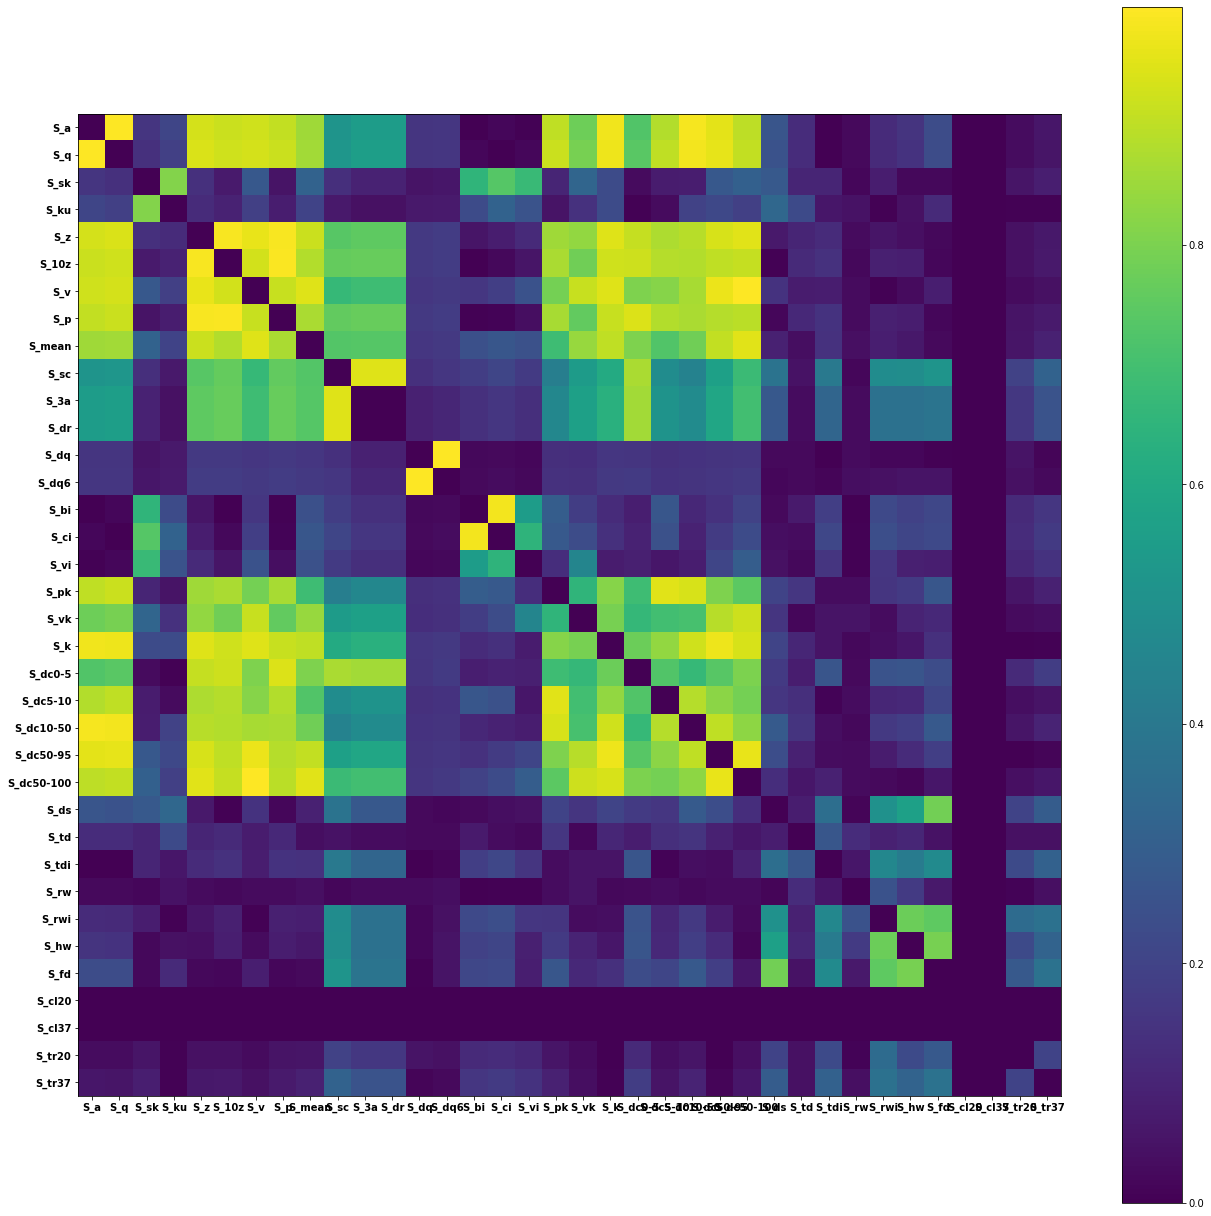

In [200]:
# Set diagonals to 0 (they are always trivially 1)
C[C == 1] = 0

# Construct heatmap
plt.figure(figsize = (22,22))
plt.xticks(range(len(C.columns)), C.columns, fontweight='bold')
plt.yticks(range(len(C.columns)), C.columns, fontweight='bold')
# We take the absolute values to not distinguish between +/- correlation
plt.imshow(np.abs(C))
plt.colorbar()
plt.savefig('simulated.png')

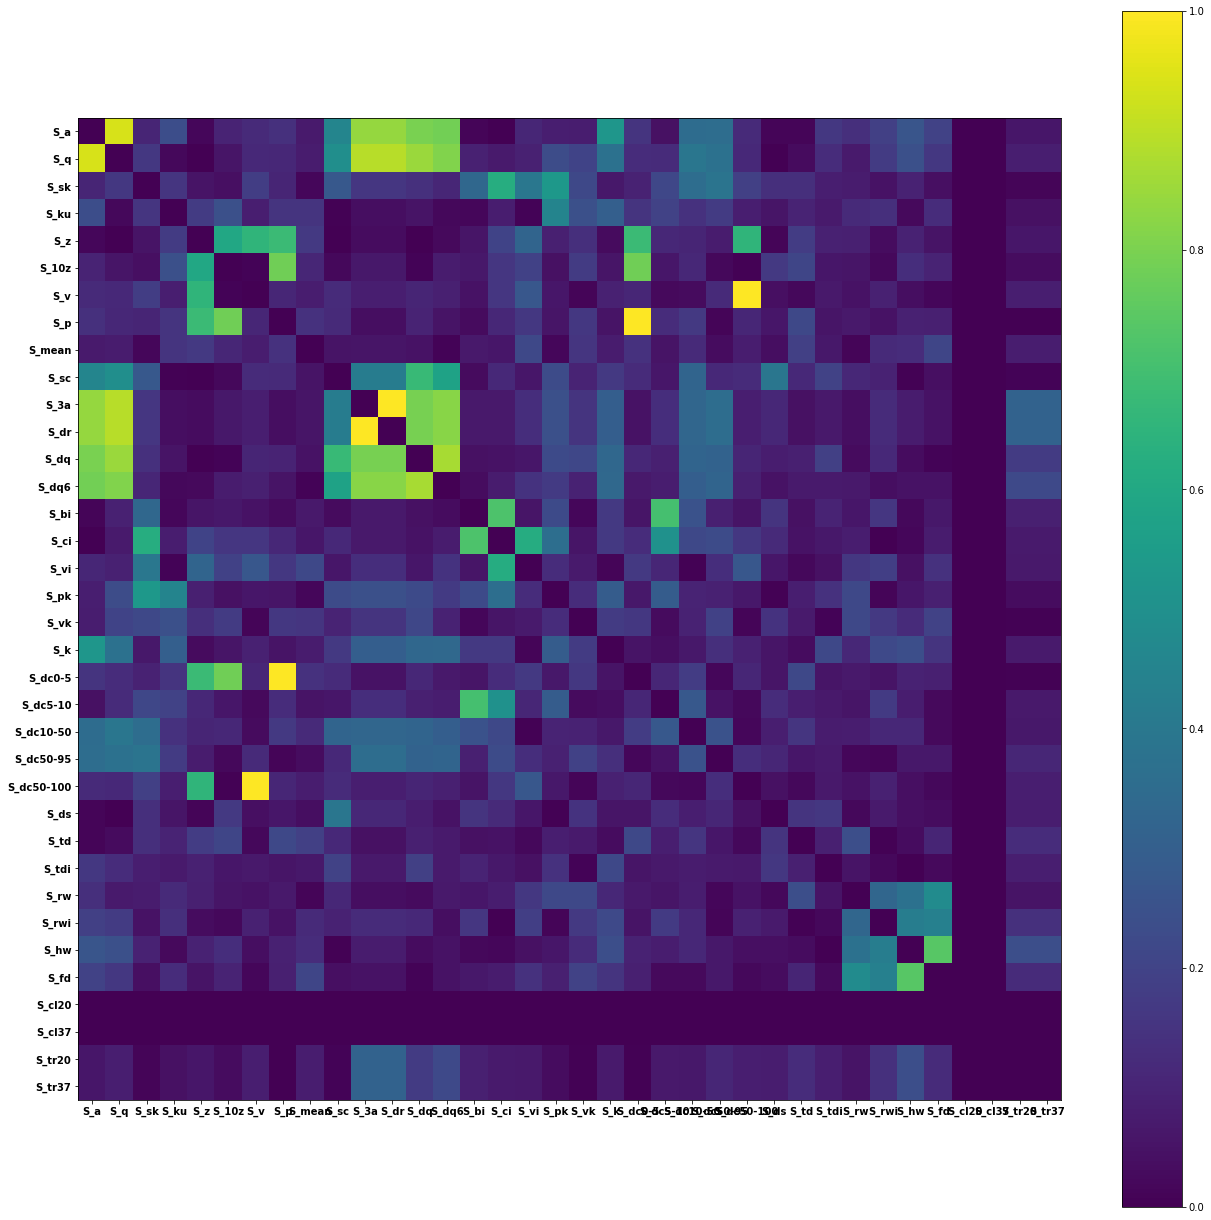

In [201]:
# Set diagonals to 0 (they are always trivially 1)
C_random[C_random == 1] = 0

# Construct heatmap
plt.figure(figsize = (22,22))
plt.xticks(range(len(C_random.columns)), C_random.columns, fontweight='bold')
plt.yticks(range(len(C_random.columns)), C_random.columns, fontweight='bold')
# We take the absolute values to not distinguish between +/- correlation
plt.imshow(np.abs(C_random))
plt.colorbar()
plt.savefig('random.png')

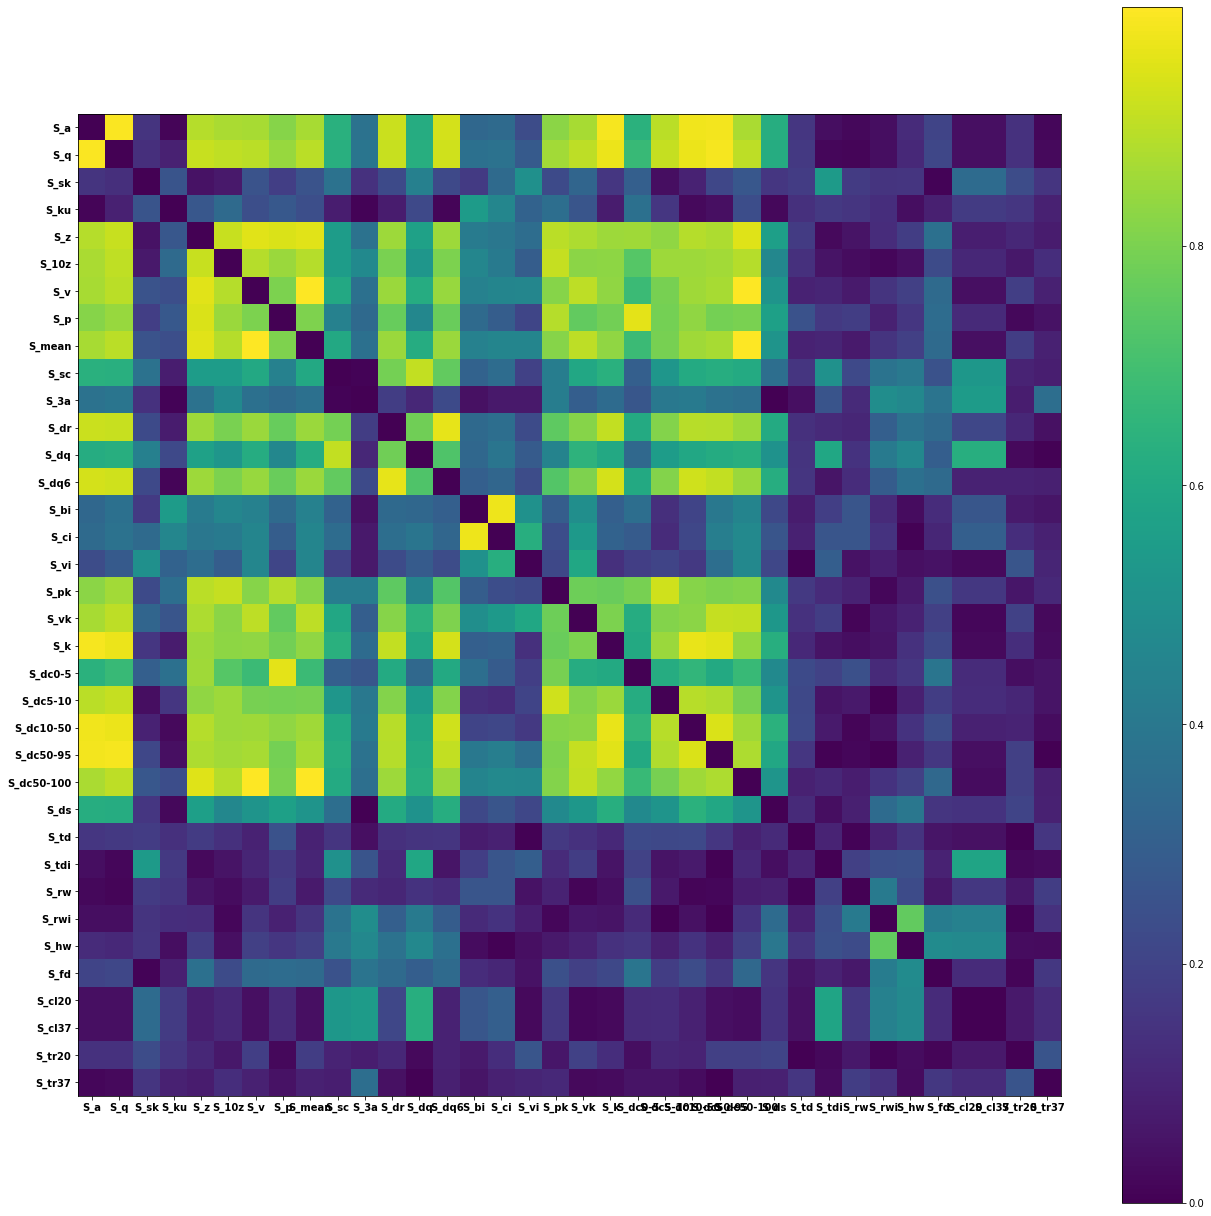

In [202]:
# Set diagonals to 0 (they are always trivially 1)
C_real[C_real == 1] = 0

# Construct heatmap
plt.figure(figsize = (22,22))
plt.xticks(range(len(C_real.columns)), C_real.columns, fontweight='bold')
plt.yticks(range(len(C_real.columns)), C_real.columns, fontweight='bold')
# We take the absolute values to not distinguish between +/- correlation
plt.imshow(np.abs(C_real))
plt.colorbar()
plt.savefig('real.png')

In [203]:
def correlated_parameters(C_ordered, start=0.0, stop=1.0):
    """Return the parameters and correlations for those pairs that are correlated within a certain range"""
    C_ordered_a = C_ordered.abs()
    return C_ordered[(C_ordered_a >= start) & (C_ordered_a <= stop)]

In [204]:
# Strongly correlated parameters
strong_cs = correlated_parameters(C_ordered, 0.75, 1.0)
strong_cs_random = correlated_parameters(C_ordered_random, 0.75, 1.0)
strong_cs_real = correlated_parameters(C_ordered_real, 0.75, 1.0)
strong_cs

S_3a    S_dr          1.000000
S_cl20  S_cl37        1.000000
S_a     S_q           0.998582
S_dq    S_dq6         0.995084
S_10z   S_p           0.991100
                        ...   
S_v     S_k          -0.951623
S_z     S_v          -0.966081
S_v     S_dc50-95    -0.969968
S_bi    S_ci         -0.982269
S_v     S_dc50-100   -0.996942
Length: 114, dtype: float64

In [205]:
# Weakly correlated parameters
weak_cs = correlated_parameters(C_ordered, 0, 0.75)
weak_cs_random = correlated_parameters(C_ordered_random, 0, 0.75)
weak_cs_real = correlated_parameters(C_ordered_real, 0, 0.75)
weak_cs

S_pk     S_dc50-100    0.747322
S_q      S_dc0-5       0.741390
S_z      S_sc          0.740241
S_dc0-5  S_dc50-95     0.739896
S_sk     S_ci          0.735637
                         ...   
         S_bi         -0.654488
S_v      S_sc         -0.670388
S_sk     S_vi         -0.675836
S_v      S_dr         -0.687364
         S_3a         -0.687364
Length: 516, dtype: float64

### Parameter exclusion

If we wanted to remove parameters that are highly correlated with others, we might adopt an iterative procedure where the one of every pair of highly correlated parameters are removed from the set of features (this is definitely not the most effective way of choosing which parameters are included)

In [206]:
def exclude(strong_cs):
    # Implements the iterative procedure described
    excluded = set()
    for S1, S2 in strong_cs.index:
        if np.random.rand() < 0.5:
            if S2 not in excluded:
                excluded.add(S1)
        else:
            if S1 not in excluded:
                excluded.add(S2)
    return excluded
excluded = exclude(strong_cs)
excluded_random = exclude(strong_cs_random)
excluded_real = exclude(strong_cs_real)

In [207]:
# Reconstruct correlation matrix, excluding the parameters in `excluded`
df_excluded = df.drop(excluded, axis=1)
df_excluded_random = df_random.drop(excluded_random, axis=1)
df_excluded_real = df_real.drop(excluded_real, axis=1)

C_excluded = df_excluded.corr()
C_excluded_random = df_excluded_random.corr()
C_excluded_real = df_excluded_real.corr()

C_ordered_excluded = (C_excluded.where(np.triu(np.ones(C_excluded.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))
C_ordered_excluded_random= (C_excluded_random.where(np.triu(np.ones(C_excluded_random.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))
C_ordered_excluded_real = (C_excluded_real.where(np.triu(np.ones(C_excluded_real.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))

In [208]:
# Verify that parameters are all relatively weakly correlated
C_ordered_excluded

S_sc   S_tdi     0.403277
       S_ds      0.381550
S_ds   S_tdi     0.362615
S_ku   S_ds      0.334447
S_sc   S_tr37    0.315006
                   ...   
S_tdi  S_hw     -0.416062
S_sc   S_hw     -0.490838
S_ds   S_hw     -0.566903
S_ci   S_vi     -0.648483
S_v    S_sc     -0.670388
Length: 91, dtype: float64

### Comparing correlation matrices

Aside from visually comparing the heatmaps for each correlation matrix, we can try and quantify their similarities differences. We try this in two ways: 

1. Comparing the reduced set of parameters that each one corresponds to after filtering out strongly correlated parameters 
2. Finding the pairwise correlations of their correlation matrices

In [209]:
# Get the reduced set of parameters for simulated dataset
reduced_parameters = set(list(sum(C_ordered_excluded.index, ())))
reduced_parameters, f"Count: {len(reduced_parameters)}"

({'S_ci',
  'S_cl20',
  'S_dq',
  'S_ds',
  'S_hw',
  'S_ku',
  'S_rw',
  'S_sc',
  'S_td',
  'S_tdi',
  'S_tr20',
  'S_tr37',
  'S_v',
  'S_vi'},
 'Count: 14')

In [210]:
# Get the reduced set of parameters for Gaussian dataset
reduced_parameters_random = set(list(sum(C_ordered_excluded_random.index, ())))
reduced_parameters_random, f"Count: {len(reduced_parameters_random)}"

({'S_10z',
  'S_a',
  'S_bi',
  'S_ci',
  'S_cl37',
  'S_dc10-50',
  'S_dc5-10',
  'S_dc50-100',
  'S_dc50-95',
  'S_ds',
  'S_fd',
  'S_hw',
  'S_k',
  'S_ku',
  'S_mean',
  'S_pk',
  'S_rw',
  'S_rwi',
  'S_sc',
  'S_sk',
  'S_td',
  'S_tdi',
  'S_tr20',
  'S_vi',
  'S_vk',
  'S_z'},
 'Count: 26')

In [211]:
# Get the reduced set of parameters for Gaussian dataset
reduced_parameters_real = set(list(sum(C_ordered_excluded_real.index, ())))
reduced_parameters_real, f"Count: {len(reduced_parameters_real)}"

({'S_3a',
  'S_bi',
  'S_cl20',
  'S_dc0-5',
  'S_dc50-100',
  'S_dq',
  'S_ds',
  'S_fd',
  'S_ku',
  'S_rw',
  'S_rwi',
  'S_sk',
  'S_td',
  'S_tdi',
  'S_tr20',
  'S_tr37',
  'S_vi'},
 'Count: 17')

In [212]:
print(f"Reduced parameters shared by simulated and real matrices: {reduced_parameters.intersection(reduced_parameters_real)}")
print(f"Reduced parameters shared by simulated and random matrices: {reduced_parameters.intersection(reduced_parameters_random)}")
print(f"Reduced parameters shared by random and real matrices: {reduced_parameters_random.intersection(reduced_parameters_real)}")

Reduced parameters shared by simulated and real matrices: {'S_ds', 'S_tr20', 'S_ku', 'S_td', 'S_cl20', 'S_tdi', 'S_tr37', 'S_rw', 'S_dq', 'S_vi'}
Reduced parameters shared by simulated and random matrices: {'S_ds', 'S_tr20', 'S_sc', 'S_ci', 'S_ku', 'S_td', 'S_tdi', 'S_hw', 'S_rw', 'S_vi'}
Reduced parameters shared by random and real matrices: {'S_tr20', 'S_ds', 'S_ku', 'S_td', 'S_sk', 'S_tdi', 'S_rw', 'S_vi', 'S_rwi', 'S_dc50-100', 'S_fd', 'S_bi'}


In [213]:
print("Pairwise correlations between simulated corr. matrix and random corr. matrix")
corr_simulated_random = C.corrwith(C_random)
corr_simulated_random.to_csv('simulated_random_correlation.csv', header=False)
corr_simulated_random


Pairwise correlations between simulated corr. matrix and random corr. matrix


S_a           0.313282
S_q           0.315283
S_sk          0.695439
S_ku          0.280848
S_z           0.512716
S_10z         0.225006
S_v           0.372589
S_p           0.178225
S_mean        0.274038
S_sc          0.171177
S_3a          0.081568
S_dr          0.081568
S_dq          0.517136
S_dq6         0.531324
S_bi          0.722480
S_ci          0.839473
S_vi          0.666194
S_pk          0.008070
S_vk         -0.025333
S_k           0.284393
S_dc0-5       0.215197
S_dc5-10      0.181687
S_dc10-50     0.053194
S_dc50-95     0.399577
S_dc50-100    0.554178
S_ds         -0.051356
S_td          0.069896
S_tdi         0.139430
S_rw          0.473200
S_rwi         0.484593
S_hw          0.635140
S_fd          0.576618
S_cl20        0.761781
S_cl37        0.761781
S_tr20        0.131213
S_tr37        0.247508
dtype: float64

In [214]:
print("Pairwise correlations between simulated corr. matrix and real corr. matrix")
corr_simulated_real = C.corrwith(C_real)
corr_simulated_real.to_csv('simulated_real_correlation.csv', header=False)
corr_simulated_real

Pairwise correlations between simulated corr. matrix and real corr. matrix


S_a           0.904776
S_q           0.902661
S_sk          0.597135
S_ku         -0.246343
S_z           0.899295
S_10z         0.895519
S_v           0.882403
S_p           0.886665
S_mean        0.906470
S_sc          0.654420
S_3a          0.349443
S_dr          0.798867
S_dq          0.548278
S_dq6         0.578213
S_bi          0.559299
S_ci          0.552366
S_vi          0.701686
S_pk          0.872271
S_vk          0.905029
S_k           0.913557
S_dc0-5       0.822657
S_dc5-10      0.899595
S_dc10-50     0.897129
S_dc50-95     0.916671
S_dc50-100    0.906202
S_ds          0.267085
S_td          0.559082
S_tdi        -0.369621
S_rw          0.462347
S_rwi         0.420016
S_hw          0.250184
S_fd          0.068831
S_cl20        0.230070
S_cl37        0.230070
S_tr20        0.130280
S_tr37        0.123616
dtype: float64

In [215]:
print("Pairwise correlations between random corr. matrix and real corr. matrix")
corr_random_real = C_random.corrwith(C_real)
corr_random_real.to_csv('random_real_correlation.csv', header=False)
corr_random_real

Pairwise correlations between random corr. matrix and real corr. matrix


S_a           0.420619
S_q           0.412527
S_sk          0.394941
S_ku          0.450339
S_z           0.519788
S_10z         0.200193
S_v           0.406152
S_p           0.208993
S_mean        0.249236
S_sc          0.461146
S_3a          0.185802
S_dr          0.382220
S_dq          0.426309
S_dq6         0.456454
S_bi          0.429091
S_ci          0.543658
S_vi          0.657752
S_pk         -0.054664
S_vk          0.185290
S_k           0.357049
S_dc0-5       0.289340
S_dc5-10     -0.004152
S_dc10-50     0.091638
S_dc50-95     0.510867
S_dc50-100    0.575974
S_ds          0.117502
S_td          0.008707
S_tdi        -0.323835
S_rw          0.319036
S_rwi         0.377117
S_hw          0.403358
S_fd          0.393647
S_cl20        0.443407
S_cl37        0.443407
S_tr20       -0.127924
S_tr37        0.246699
dtype: float64